In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
file_path = 'D:\Prab\IPS-Project\synthetic_data_point\original_CMKL1.csv'
data = pd.read_csv(file_path)

data.head(), data.columns

(                        _id  RSSI1  RSSI2  RSSI3  RSSI4  RSSI5  RSSI6  RSSI7   
 0  65e59f68814e2daba1443def   -100   -100   -100   -100   -100   -100    -88  \
 1  65e59f68814e2daba1443df0   -100   -100   -100   -100   -100   -100    -87   
 2  65e59f68814e2daba1443df1   -100   -100   -100   -100   -100   -100    -87   
 3  65e59f68814e2daba1443df2   -100   -100   -100   -100   -100   -100    -86   
 4  65e59f68814e2daba1443df3   -100   -100   -100   -100   -100   -100    -88   
 
    RSSI8  RSSI9  ...       model    x    y  z                created_at   
 0   -100   -100  ...  23106RN0DA  0.0  0.0  0  2024-03-04T10:15:55.000Z  \
 1    -87   -100  ...  23106RN0DA  0.0  0.0  0  2024-03-04T10:15:58.000Z   
 2    -87   -100  ...  23106RN0DA  0.0  0.0  0  2024-03-04T10:15:59.000Z   
 3    -87   -100  ...  23106RN0DA  0.0  0.0  0  2024-03-04T10:16:07.000Z   
 4   -100   -100  ...  23106RN0DA  0.0  0.0  0  2024-03-04T10:15:51.000Z   
 
    polling_rate  collection_stage                    

In [3]:
# Extract the relevant columns (RSSI values and coordinates)
rssi_columns = [f'RSSI{i}' for i in range(1, 19)]

# # Replace -100 with NaN for RSSI values
# data[rssi_columns] = data[rssi_columns].replace(-100, np.nan)

# # Impute NaN values in RSSI columns with the mean of each column
# imputer = SimpleImputer(strategy='mean')
# data[rssi_columns] = imputer.fit_transform(data[rssi_columns])

coordinate_columns = ['x', 'y', 'z']
relevant_columns = rssi_columns + coordinate_columns


# Extract the relevant data
relevant_data = data[relevant_columns]

# Display the first few rows of the relevant data
relevant_data.head()

,RSSI1,RSSI2,RSSI3,RSSI4,RSSI5,RSSI6,RSSI7,RSSI8,RSSI9,RSSI10,...,RSSI12,RSSI13,RSSI14,RSSI15,RSSI16,RSSI17,RSSI18,x,y,z
0,-100,-100,-100,-100,-100,-100,-88,-100,-100,-86,...,-100,-100,-80,-100,-77,-100,-50,0.0,0.0,0
1,-100,-100,-100,-100,-100,-100,-87,-87,-100,-85,...,-100,-100,-88,-85,-77,-100,-49,0.0,0.0,0
2,-100,-100,-100,-100,-100,-100,-87,-87,-100,-85,...,-100,-100,-88,-85,-77,-100,-49,0.0,0.0,0
3,-100,-100,-100,-100,-100,-100,-86,-87,-100,-85,...,-100,-100,-87,-81,-78,-100,-51,0.0,0.0,0
4,-100,-100,-100,-100,-100,-100,-88,-100,-100,-86,...,-100,-100,-80,-100,-77,-100,-50,0.0,0.0,0


In [4]:
## Data Normalization
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
rssi_scaler = MinMaxScaler(feature_range=(0, 1))
coord_scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize RSSI values
normalized_rssi = rssi_scaler.fit_transform(data[rssi_columns] + 100)  # Shift values to [0, 100] then normalize

# Normalize coordinates
normalized_coords = coord_scaler.fit_transform(data[['x', 'y']])

# Combine normalized data
normalized_data = pd.DataFrame(normalized_rssi, columns=rssi_columns)
normalized_data[['x', 'y']] = normalized_coords
normalized_data['z'] = data['z']  # Keep 'z' as it is, we'll handle it separately

# Display the first few rows of normalized data
normalized_data.head()

,RSSI1,RSSI2,RSSI3,RSSI4,RSSI5,RSSI6,RSSI7,RSSI8,RSSI9,RSSI10,...,RSSI12,RSSI13,RSSI14,RSSI15,RSSI16,RSSI17,RSSI18,x,y,z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.000000,0.0,0.285714,...,0.0,0.0,0.465116,0.000000,0.575,0.0,0.909091,0.067797,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.228070,0.276596,0.0,0.306122,...,0.0,0.0,0.279070,0.348837,0.575,0.0,0.927273,0.067797,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.228070,0.276596,0.0,0.306122,...,0.0,0.0,0.279070,0.348837,0.575,0.0,0.927273,0.067797,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.245614,0.276596,0.0,0.306122,...,0.0,0.0,0.302326,0.441860,0.550,0.0,0.890909,0.067797,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.000000,0.0,0.285714,...,0.0,0.0,0.465116,0.000000,0.575,0.0,0.909091,0.067797,0.0,0


In [5]:
## GAN Model Training

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

tensor_data = torch.tensor(normalized_data.values, dtype=torch.float32)
train_size = int(0.8 * len(tensor_data))
val_size = len(tensor_data) - train_size
train_dataset, val_dataset = random_split(tensor_data, [train_size, val_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

input_dim = 100
output_dim = normalized_data.shape[1]
data_dim = normalized_data.shape[1]

generator = Generator(input_dim, output_dim)
discriminator = Discriminator(data_dim)

lr = 0.0002
betas = (0.5, 0.999)
g_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=betas)
d_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=betas)

criterion = nn.BCELoss()
num_epochs = 1000 

for epoch in range(num_epochs):
    for real_data in train_loader:
        real_data = real_data.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
        batch_size = real_data.size(0)

        real_labels = torch.ones(batch_size, 1).to(real_data.device)
        fake_labels = torch.zeros(batch_size, 1).to(real_data.device)

        outputs = discriminator(real_data)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, input_dim).to(real_data.device)
        fake_data = generator(z)
        outputs = discriminator(fake_data.detach())
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        outputs = discriminator(fake_data)
        g_loss = criterion(outputs, real_labels)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.4f}, D(G(z)): {fake_score.mean().item():.4f}')


Epoch [10/1000], d_loss: 1.2849, g_loss: 0.6731, D(x): 0.5840, D(G(z)): 0.5231
Epoch [20/1000], d_loss: 1.1743, g_loss: 0.8537, D(x): 0.5545, D(G(z)): 0.4381
Epoch [30/1000], d_loss: 1.2712, g_loss: 0.8146, D(x): 0.5484, D(G(z)): 0.4650
Epoch [40/1000], d_loss: 1.2940, g_loss: 0.7742, D(x): 0.5377, D(G(z)): 0.4777
Epoch [50/1000], d_loss: 1.1438, g_loss: 1.0066, D(x): 0.5336, D(G(z)): 0.3794
Epoch [60/1000], d_loss: 1.3629, g_loss: 0.6974, D(x): 0.5326, D(G(z)): 0.5096
Epoch [70/1000], d_loss: 1.2863, g_loss: 0.8336, D(x): 0.5057, D(G(z)): 0.4412
Epoch [80/1000], d_loss: 1.2009, g_loss: 0.9601, D(x): 0.5472, D(G(z)): 0.4409
Epoch [90/1000], d_loss: 1.4051, g_loss: 0.7793, D(x): 0.5514, D(G(z)): 0.5427
Epoch [100/1000], d_loss: 1.3499, g_loss: 0.8372, D(x): 0.5287, D(G(z)): 0.4987
Epoch [110/1000], d_loss: 1.3303, g_loss: 0.7052, D(x): 0.5374, D(G(z)): 0.5021
Epoch [120/1000], d_loss: 1.3659, g_loss: 0.7419, D(x): 0.5199, D(G(z)): 0.5012
Epoch [130/1000], d_loss: 1.2564, g_loss: 0.8365,

1. d_loss (Discriminator Loss)
    The discriminator loss (d_loss) measures how well the discriminator can distinguish between real and fake data. It is calculated as the sum of the loss for real data and the loss for fake data.

    -   Real Data Loss: How well the discriminator classifies real data as real.
    -   Fake Data Loss: How well the discriminator classifies fake data as fake.

    A lower d_loss indicates that the discriminator is performing well in distinguishing real data from fake data.

2. g_loss (Generator Loss)
    The generator loss (g_loss) measures how well the generator can produce data that can fool the discriminator. It is calculated based on how the discriminator classifies the generated (fake) data.

    -   Fake Data Loss: How well the discriminator classifies fake data as real.

    A lower g_loss indicates that the generator is producing data that is more realistic and is successfully fooling the discriminator.

3. D(x) (Discriminator Output for Real Data)
    D(x) represents the average output of the discriminator when given real data samples.

    -   High D(x): Indicates the discriminator is confident that real data is real (close to 1).
    -   Low D(x): Indicates the discriminator is not confident that real data is real (close to 0).

4. D(G(z)) (Discriminator Output for Generated Data)
    D(G(z)) represents the average output of the discriminator when given fake data samples produced by the generator.

    -   High D(G(z)): Indicates the discriminator is not able to distinguish generated data from real data (close to 1, which is not ideal for the discriminator).
    -   Low D(G(z)): Indicates the discriminator is correctly identifying the generated data as fake (close to 0).


Typical Training Dynamics
    -   Early Training:

        -   d_loss might be high because the discriminator is still learning to distinguish real from fake data.
        -   g_loss might be high because the generator is still learning to produce realistic data.
        -   D(x) might be around 0.5 as the discriminator is uncertain.
        -   D(G(z)) might be high as the discriminator is not yet good at identifying fake data.

    -   Later Training:

        -   d_loss and g_loss both decrease as the models improve.
        -   D(x) should approach 1, indicating that the discriminator is confident about real data.
        -   D(G(z)) should approach 0, indicating that the discriminator is correctly identifying generated data as fake.

In [6]:
# Generate synthetic data
z = torch.randn(len(tensor_data), input_dim).to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
synthetic_data = generator(z).detach().cpu().numpy()

# Inverse transform RSSI values to original scale [-100, 0]
synthetic_rssi = rssi_scaler.inverse_transform(synthetic_data[:, :18]) - 100

# Inverse transform x and y coordinates
synthetic_coords = coord_scaler.inverse_transform(synthetic_data[:, 18:20])

# Ensure z is an integer (0 or 1)
synthetic_z = np.round(synthetic_data[:, 20])

# Clip RSSI values to be within [-100, 0]
synthetic_rssi = np.clip(synthetic_rssi, -100, 0)

# Combine synthetic RSSI values and coordinates
synthetic_data_combined = pd.DataFrame(synthetic_rssi, columns=rssi_columns)
synthetic_data_combined[['x', 'y']] = synthetic_coords
synthetic_data_combined['z'] = synthetic_z

# Save the synthetic data to a CSV file
synthetic_data_combined.to_csv('GANs_synthetic_data.csv', index=False)

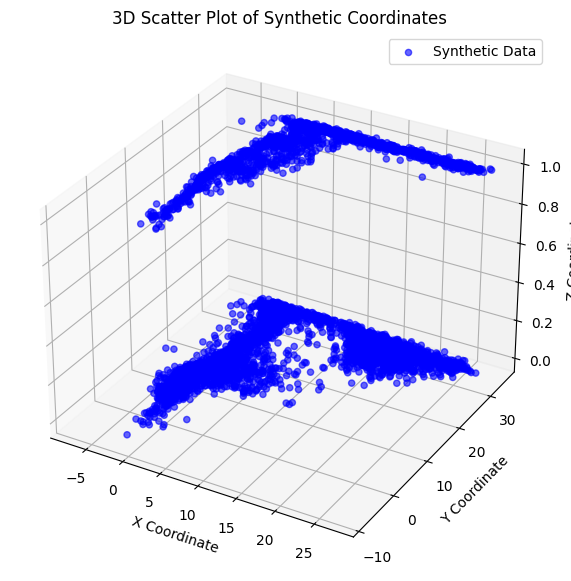

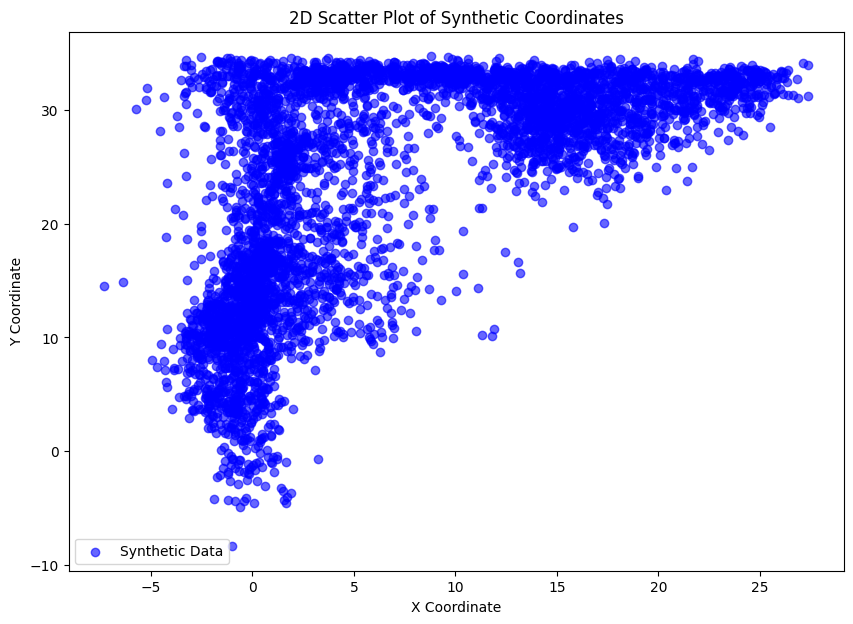

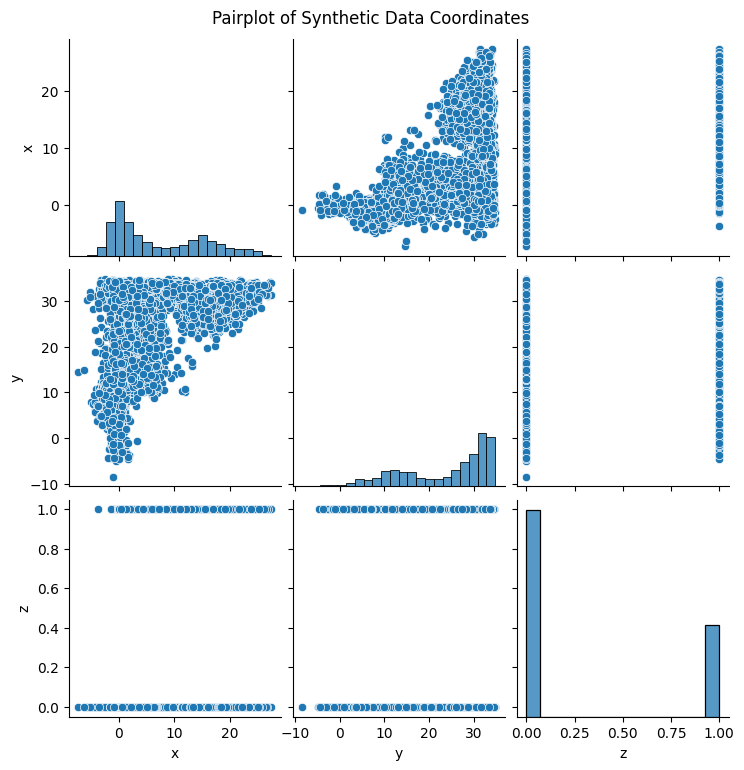

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the synthetic data
synthetic_data = pd.read_csv('synthetic_data.csv')

# 3D Scatter plot of the coordinates x, y, z
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the synthetic data
sc = ax.scatter(synthetic_data['x'], synthetic_data['y'], synthetic_data['z'], c='blue', marker='o', alpha=0.6, label='Synthetic Data')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('3D Scatter Plot of Synthetic Coordinates')

plt.legend()
plt.show()

# 2D Scatter plot of the x and y coordinates
plt.figure(figsize=(10, 7))
plt.scatter(synthetic_data['x'], synthetic_data['y'], alpha=0.6, c='blue', label='Synthetic Data')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Scatter Plot of Synthetic Coordinates')
plt.legend()
plt.show()

# Pairplot of the synthetic data for x, y, z coordinates
sns.pairplot(synthetic_data[['x', 'y', 'z']])
plt.suptitle('Pairplot of Synthetic Data Coordinates', y=1.02)
plt.show()


In [8]:
coordinates = synthetic_data[['x', 'y', 'z']].values
rssi_values = synthetic_data.iloc[:, 1:19].values

print(synthetic_data[['x', 'y', 'z']].describe())
print("-----------------------------------------")
print(synthetic_data.iloc[:, 0:18].describe())

                 x            y            z
count  4897.000000  4897.000000  4897.000000
mean      7.141773    23.607202     0.307331
std       8.113715     9.783125     0.461435
min      -7.324242    -8.365254     0.000000
25%       0.229651    14.946713     0.000000
50%       3.871943    27.761063     0.000000
75%      14.367052    32.061626     1.000000
max      27.389668    34.744213     1.000000
-----------------------------------------
             RSSI1        RSSI2        RSSI3        RSSI4        RSSI5   
count  4897.000000  4897.000000  4897.000000  4897.000000  4897.000000  \
mean    -94.277063   -92.837052   -95.405959   -97.010708   -99.495776   
std      11.047825    13.337798     9.748195     7.330981     2.547814   
min    -100.000000  -100.000000  -100.000000  -100.000000  -100.000000   
25%    -100.000000  -100.000000  -100.000000  -100.000000  -100.000000   
50%     -99.699280  -100.000000  -100.000000   -99.951280   -99.918590   
75%     -97.502340   -92.676090   -

(4897, 3)
(4897, 18)


C:\Users\prabw\AppData\Local\Temp\ipykernel_44616\3048911437.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


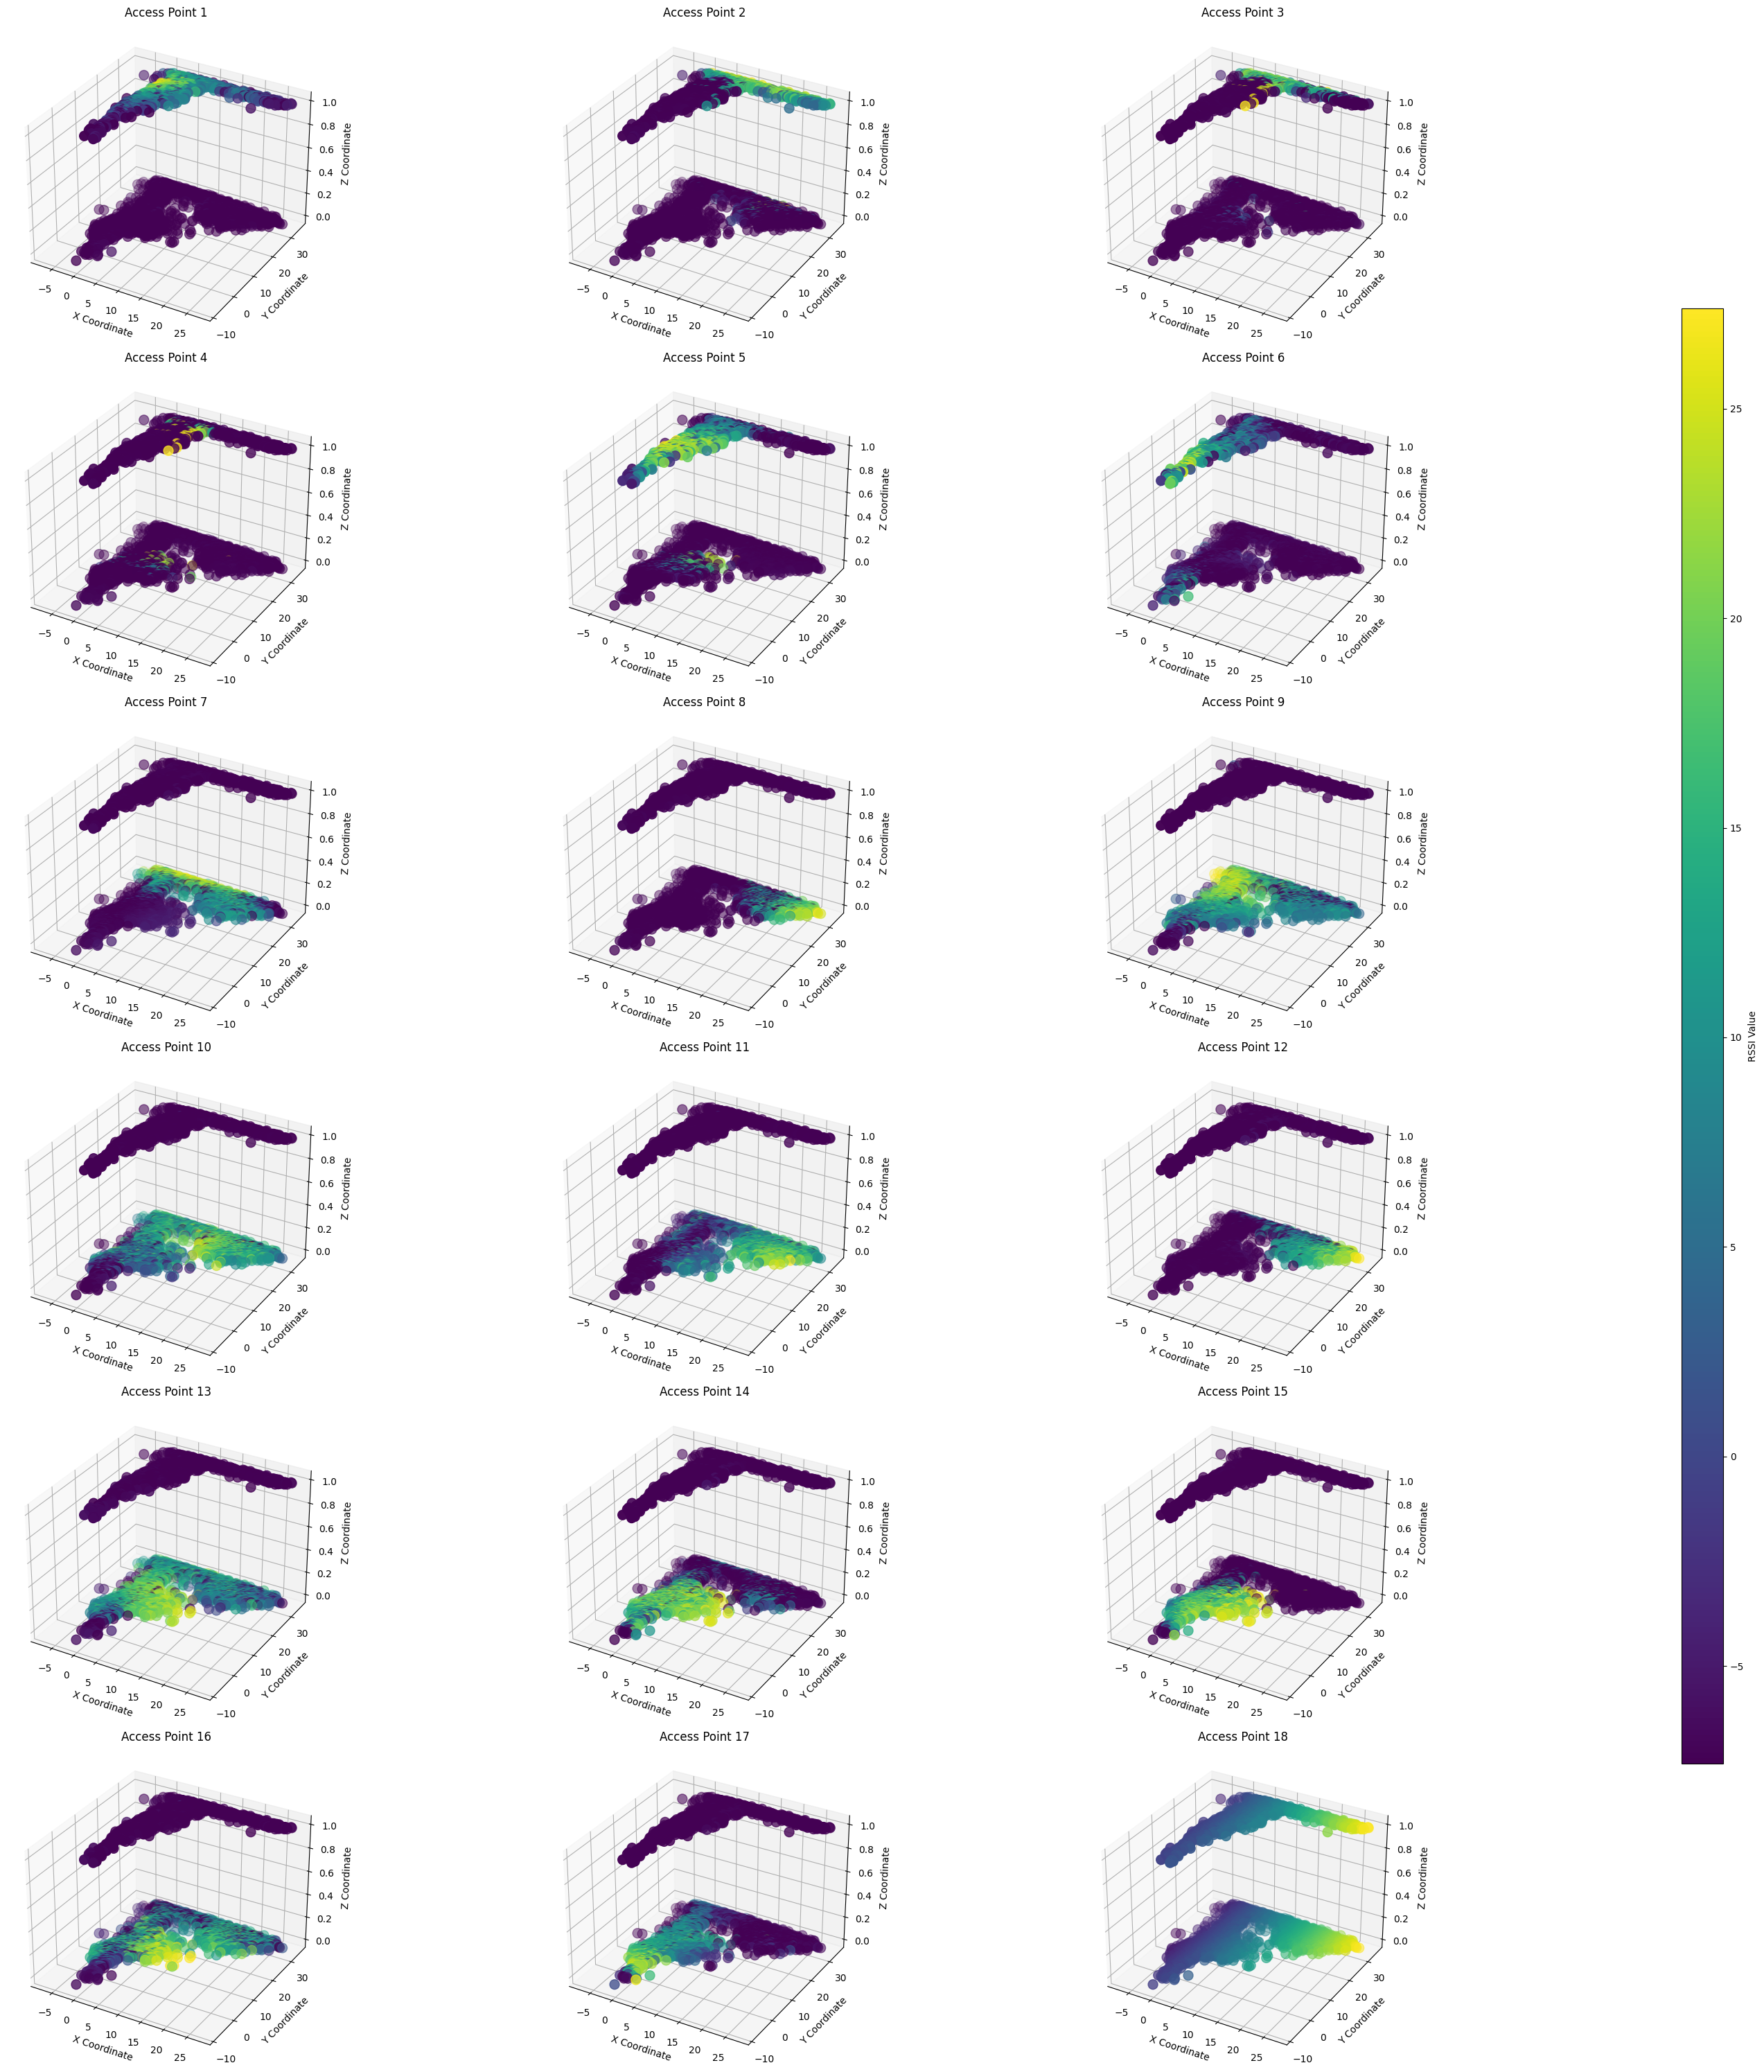

In [9]:
# Plotting
fig, axs = plt.subplots(6, 3, figsize=(30, 30), subplot_kw={'projection': '3d'})
axs = axs.ravel()

print(coordinates.shape)
print(rssi_values.shape)

for i in range(rssi_values.shape[1]):
    ax = axs[i]
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    z = coordinates[:, 2]
    rssi = rssi_values[:, i]
    
    sc = ax.scatter(x, y, z, c=rssi, cmap='viridis', s=100)
    ax.set_title(f'Access Point {i+1}')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.grid(True)

# Add color bar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax)
cbar.set_label('RSSI Value')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


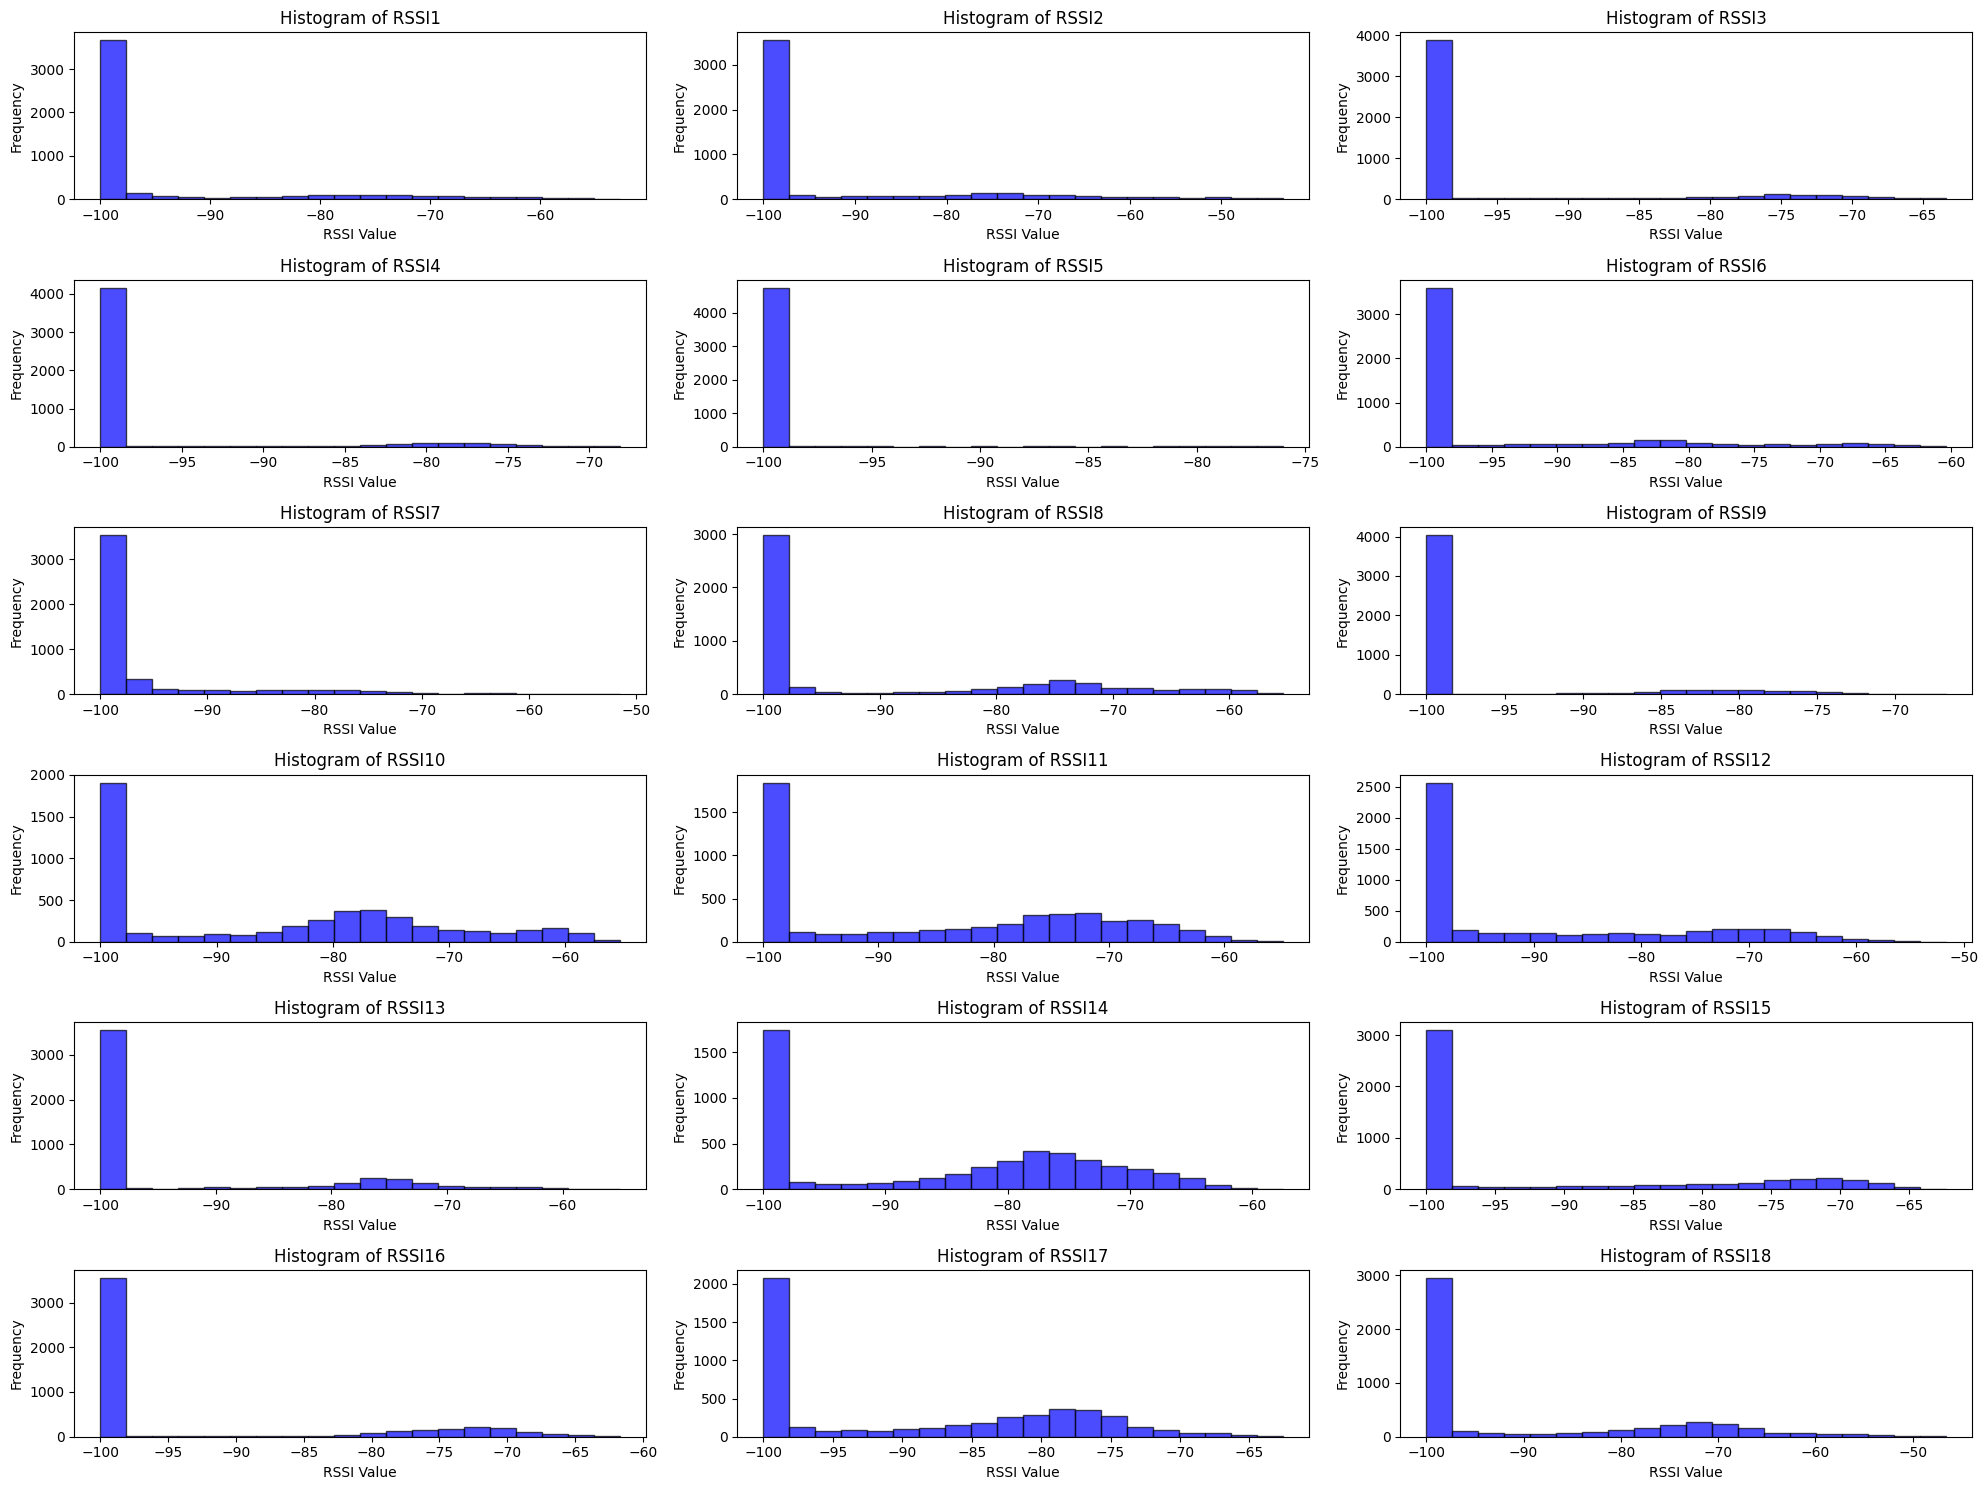

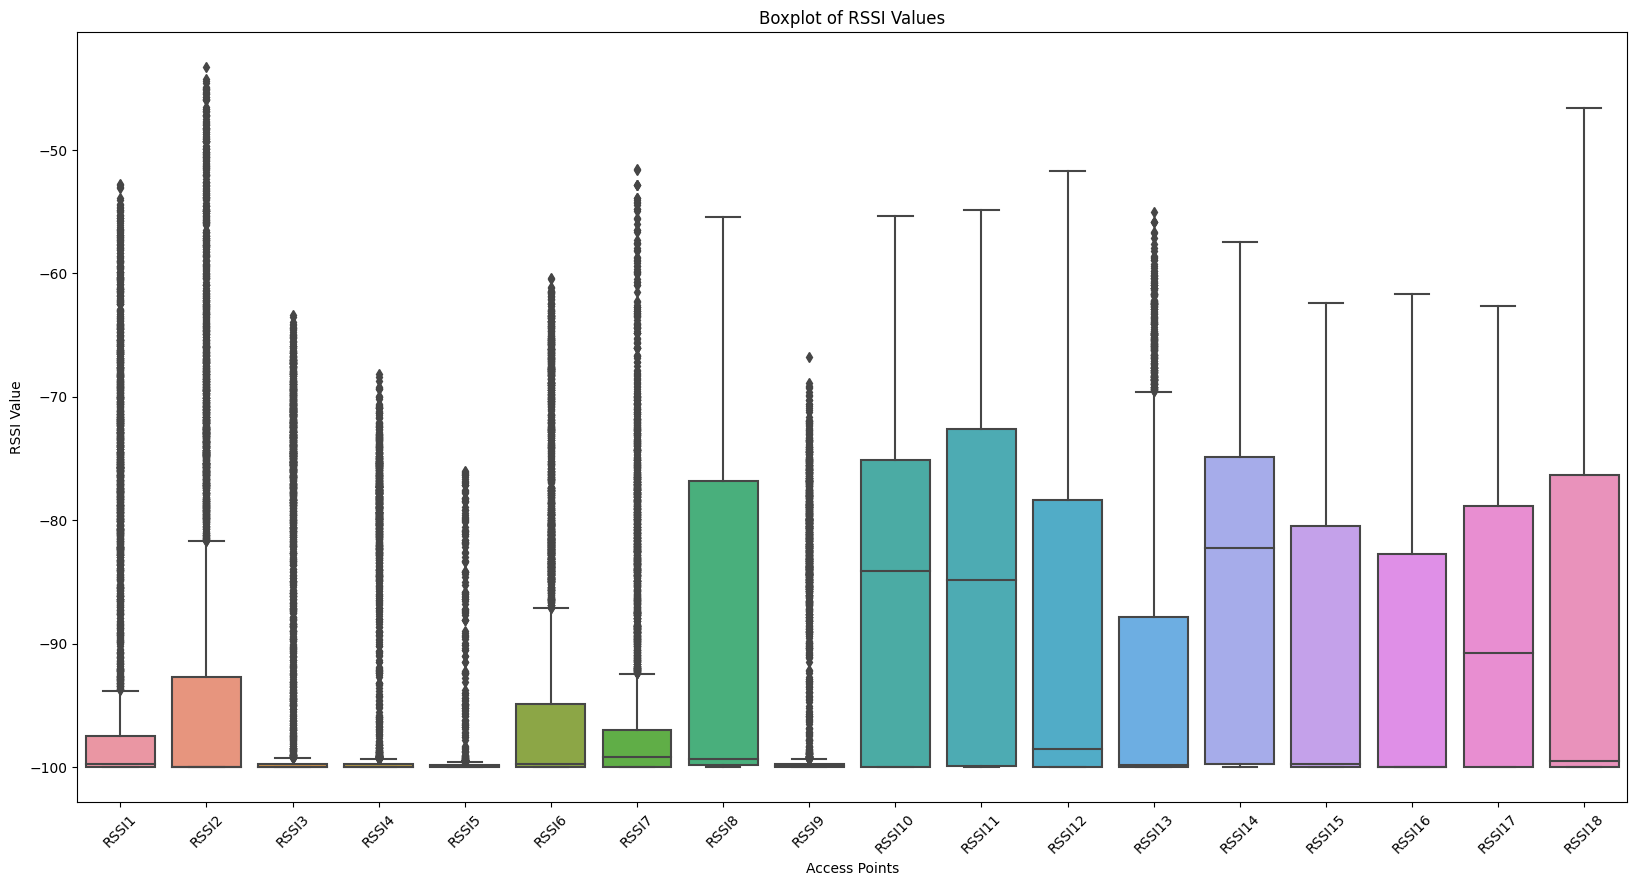

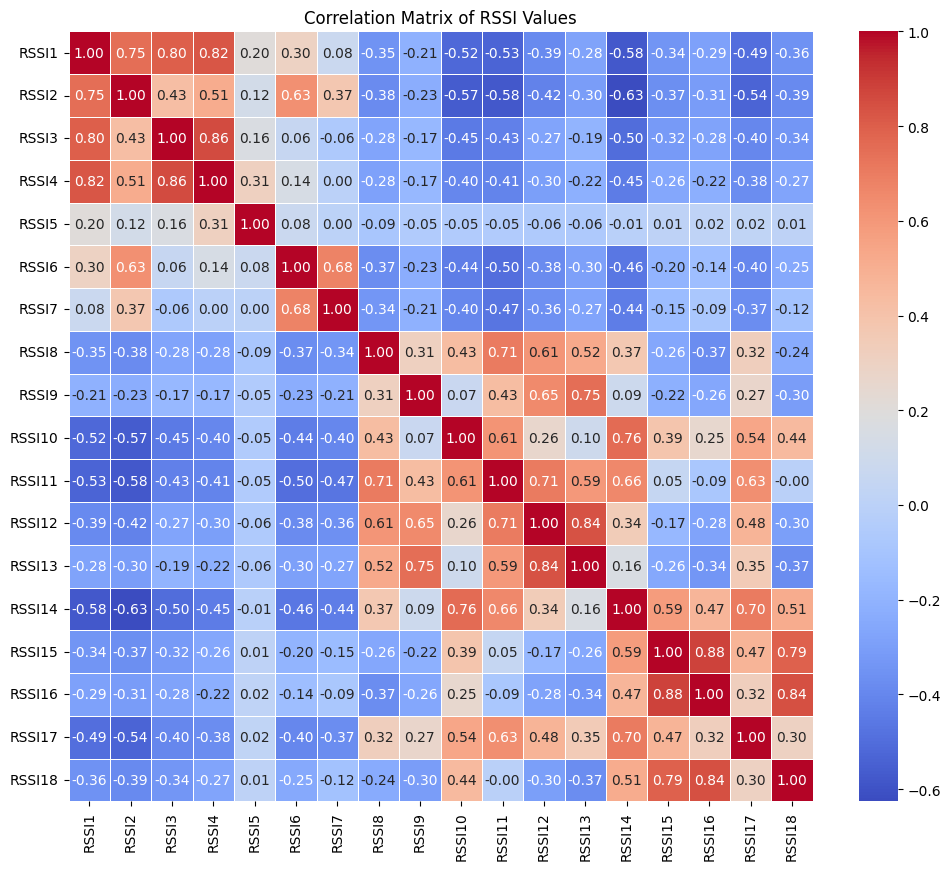

In [10]:
# Load the synthetic data
synthetic_data = pd.read_csv('synthetic_data.csv')

# threshold = -95  # Define the threshold value
# data[data <= threshold] = np.nan

# Define the relevant columns
rssi_columns = [f'RSSI{i}' for i in range(1, 19)]

# Plot histograms for each RSSI column
plt.figure(figsize=(20, 15))
for i, col in enumerate(rssi_columns, 1):
    plt.subplot(6, 3, i)
    plt.hist(synthetic_data[col], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('RSSI Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot boxplots for each RSSI column
plt.figure(figsize=(20, 10))
sns.boxplot(data=synthetic_data[rssi_columns])
plt.title('Boxplot of RSSI Values')
plt.xlabel('Access Points')
plt.ylabel('RSSI Value')
plt.xticks(rotation=45)
plt.show()

# Calculate the correlation matrix
corr_matrix = synthetic_data[rssi_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of RSSI Values')
plt.show()